## Statistic Description

In [1]:
#Importamos y guardamos el dataframe

import pandas as pd

RUTA_DATAFRAME = '/home/tr4shhh/Proyects/4geeks/14-Linear_Regression/linear-regression/data/interim/medical_without_duplicates.csv'

df = pd.read_csv(RUTA_DATAFRAME, sep=',')

In [2]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1332,50,male,30.970,3,no,northwest,10600.54830
1333,18,female,31.920,0,no,northeast,2205.98080
1334,18,female,36.850,0,no,southeast,1629.83350
1335,21,female,25.800,0,no,southwest,2007.94500


### Null information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


### Statistical description

In [4]:
#descripcion estadistica
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


- We see that the charges to the insurance price range from 1121 dollars to 63770 dollars.

In [5]:
#numero de filas y columnas
print(f'Filas: {df.shape[0]}, Columnas : {df.shape[1]}')

Filas: 1337, Columnas : 7


In [6]:
#nombres columnas
print(df.columns)

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


In [7]:
#valores unicos en cada columna
print(df.nunique())


age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64


In [8]:
#Valores unicos por columna

numero_minimo = 10

for columna in df.columns:
    # Verifica si la columna tiene menos de 10 valores únicos
    if df[columna].nunique() < numero_minimo:
        # Imprime los valores únicos de la columna 'neighbourhood_group'
        print(f"Valores únicos de {columna}: {df[columna].unique()}")

Valores únicos de sex: ['female' 'male']
Valores únicos de children: [0 1 3 2 5 4]
Valores únicos de smoker: ['yes' 'no']
Valores únicos de region: ['southwest' 'southeast' 'northwest' 'northeast']


### Surface Cleaning

In [9]:
#Copiamos el dataframe para no ser destructivos con los datos
clean_df = df.copy()

In [10]:
#Vemos las columnas que sobran
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


we have not needed to delete any columns

In [11]:
#Eliminamos las columnas que no nos daran valor al ML

eliminar =['']

#clean_df.drop(eliminar,axis=1,inplace=True)

## Univariate Description

### Categorical

In [12]:
#Nos quedamos solo con las variables categoricas 
categoricas = clean_df.select_dtypes(include='object')

In [13]:
categoricas

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest
...,...,...,...
1332,male,no,northwest
1333,female,no,northeast
1334,female,no,southeast
1335,female,no,southwest


In [14]:
categoricas.columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [15]:
categoricas.describe()

,sex,smoker,region
count,1337,1337,1337
unique,2,2,4
top,male,no,southeast
freq,675,1063,364


In [16]:
#valores unicos en cada columna
print(categoricas.nunique())


sex       2
smoker    2
region    4
dtype: int64


In [17]:
#Valores unicos por columna

numero_minimo = 10

for columna in categoricas.columns:
    # Verifica si la columna tiene menos de 10 valores únicos
    if df[columna].nunique() < numero_minimo:
        # Imprime los valores únicos de la columna 'neighbourhood_group'
        print(f"Valores únicos de {columna}: {df[columna].unique()}")

Valores únicos de sex: ['female' 'male']
Valores únicos de smoker: ['yes' 'no']
Valores únicos de region: ['southwest' 'southeast' 'northwest' 'northeast']


In [18]:
# Obtener las columnas que son variables categóricas
columnas_categoricas = categoricas.columns

# Crear una cadena para almacenar la salida
valores_categoricas = ""

# Iterar a través de las columnas categóricas y contar la frecuencia de cada valor
for columna in columnas_categoricas:
    frecuencia_categorias = df[columna].value_counts()
    valores_categoricas += f"\nFrecuencia de valores en la columna {columna}:\n{frecuencia_categorias}\n"

# Guardar la salida en un archivo Markdown (.md)
with open('../docs/variables_categoricas.md', 'w') as archivo:
    archivo.write(valores_categoricas)

print('Archivo guardado en /docs/variables_categoricas.md')

Archivo guardado en /docs/variables_categoricas.md


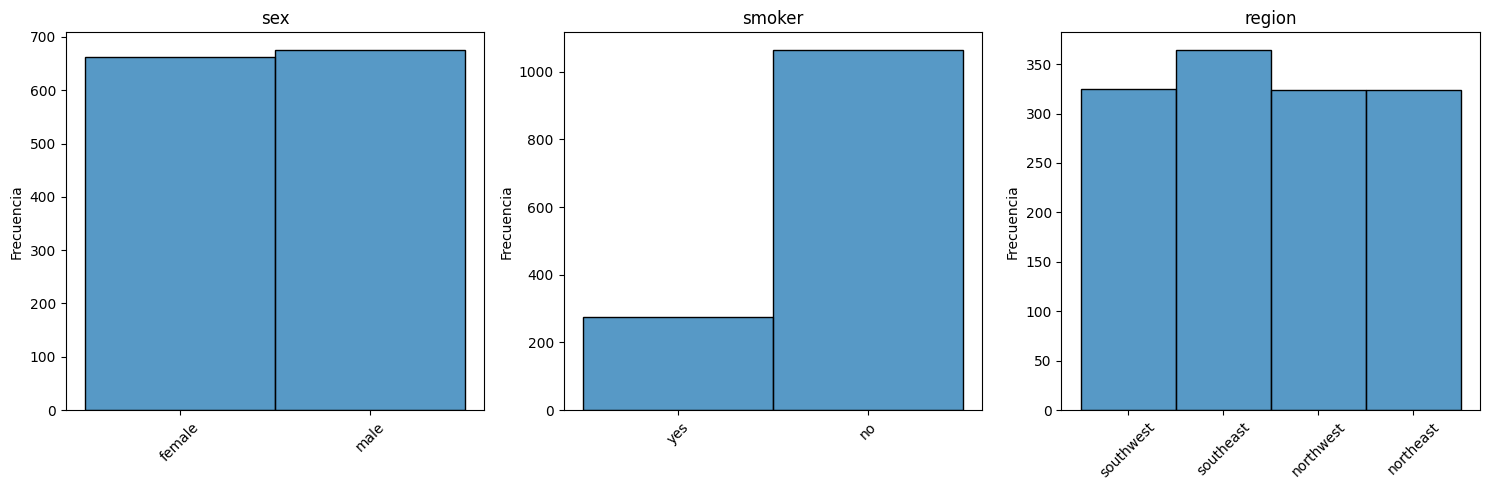

In [19]:
from utils import plot_categorical_histograms

## Crea un grafico con subgraficos para cada histograma con el limite de columnas indicado 
plot_categorical_histograms(categoricas,3)

### Numerical

In [20]:
#Nos quedamos solo con las variables numericas
numericas = clean_df.select_dtypes(include='number')

In [21]:
numericas

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1332,50,30.970,3,10600.54830
1333,18,31.920,0,2205.98080
1334,18,36.850,0,1629.83350
1335,21,25.800,0,2007.94500


In [22]:
numericas.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [23]:
#valores unicos en cada columna
print(numericas.nunique())


age           47
bmi          548
children       6
charges     1337
dtype: int64


In [24]:
#Valores unicos por columna

numero_minimo = 10

for columna in numericas.columns:
    # Verifica si la columna tiene menos de 10 valores únicos
    if df[columna].nunique() < numero_minimo:
        # Imprime los valores únicos de la columna 'neighbourhood_group'
        print(f"Valores únicos de {columna}: {df[columna].unique()}")

Valores únicos de children: [0 1 3 2 5 4]


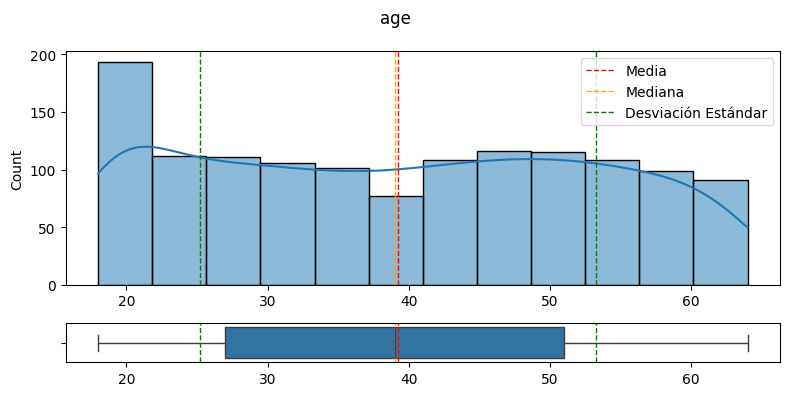

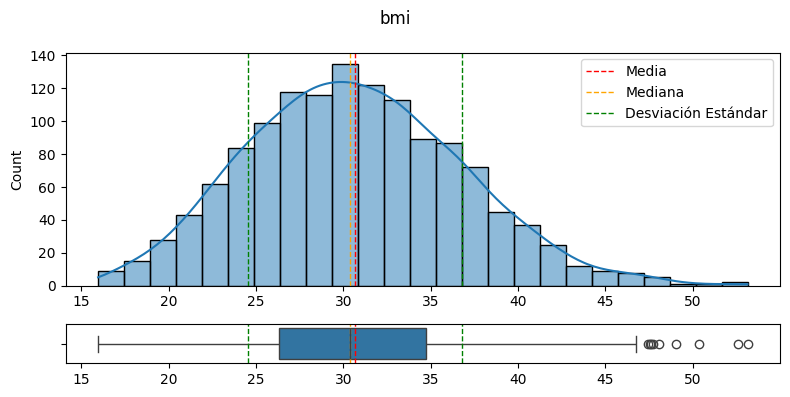

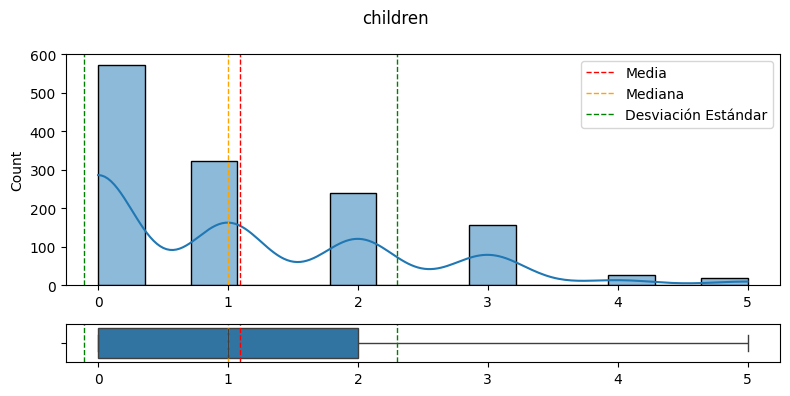

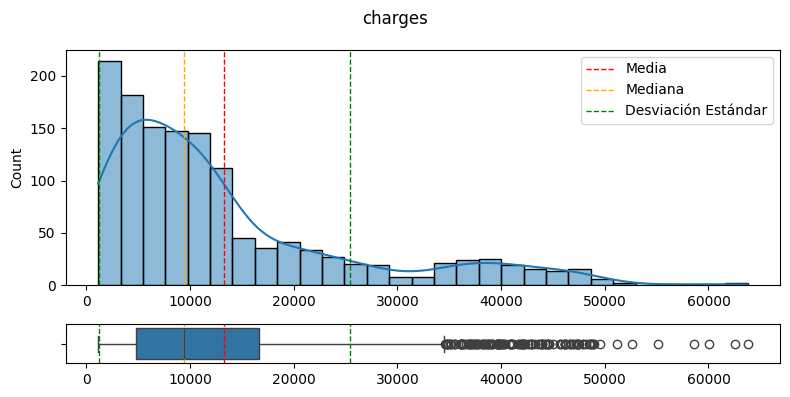

In [25]:
from utils import plot_numerical_data

plot_numerical_data(numericas)

- despite seeing many outliers in the loads, we assume that the data are correct.